In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3)

In [3]:
X

array([[ 0.24401278, -0.13525185],
       [ 1.49510827,  0.10212275],
       [ 0.2597941 ,  2.01774543],
       ...,
       [ 0.89741847, -0.19550335],
       [ 0.02458572,  0.37679529],
       [-0.08479143,  0.7998068 ]])

In [4]:
y

array([ 2.03505940e+01,  1.13501936e+02,  2.28166592e+01, -4.21850916e+01,
       -1.52825704e+02,  2.95743906e+01,  9.43918802e+00, -6.04081564e+00,
        1.04943989e+01,  2.08184164e+02, -1.17943173e+02, -8.57917762e+01,
        3.00228966e+01,  5.63656017e+01, -7.41311762e+01, -4.14739479e+01,
        1.38878329e-01, -1.73808589e+01,  1.17216147e+01,  9.50712280e+01,
        4.00444687e+01, -1.33476476e+02,  4.30064797e+01,  3.43997777e+01,
       -5.14327687e+01,  1.31593924e+02,  7.58010400e+01, -8.49060327e+01,
       -7.50382830e+01,  1.70984847e+01, -9.02250967e+01, -5.36276048e+01,
       -3.40076324e+01, -8.73969633e+01,  1.30766011e+01, -1.09303187e+01,
        1.22584679e+02,  8.28890541e+01, -1.75371117e+01, -1.59855362e+01,
        2.79259501e+01,  7.44842735e+01, -3.92818256e+01,  8.27722471e+00,
        2.44427014e+01, -1.61167041e+01,  1.04727755e+01, -3.40206311e+01,
       -1.07723257e+02, -1.08082437e+02,  6.75064616e+01, -9.04004295e+00,
        3.92970263e+01,  

In [5]:
pd.DataFrame(X)[0]

,0
0,0.244013
1,1.495108
2,0.259794
3,-0.555570
4,-1.977376
...,...
995,1.710247
996,-0.399825
997,0.897418
998,0.024586


<Axes: xlabel='0', ylabel='1'>

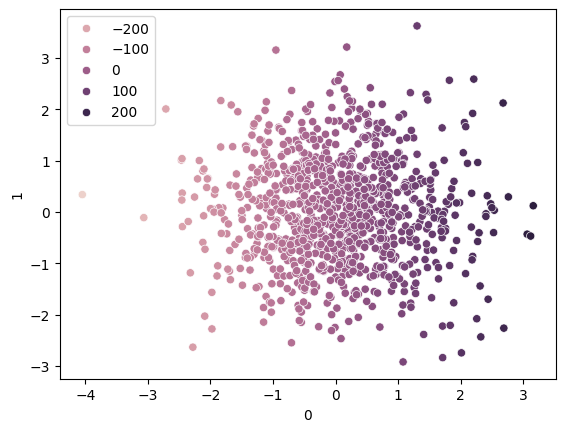

In [6]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [9]:
from sklearn.svm import SVR
model = SVR(kernel = 'linear')
model

SVR(kernel='linear')

In [10]:
model.fit(X_train, y_train)

SVR(kernel='linear')

In [11]:
model.coef_

array([[74.46551408,  2.18250902]])

In [12]:
y_pred = model.predict(X_test)
y_pred

array([-4.32978682e+01, -5.22371972e+00,  2.82864995e+01, -5.01888442e+01,
       -4.20204676e+01,  8.34383192e+01, -3.72523968e+01, -2.88335197e+01,
        6.35572115e+00, -1.11537321e+02, -3.70159467e+01, -6.87323565e+01,
       -1.75400275e+02,  4.87340524e+00,  3.59448674e+01,  1.24125051e+01,
        1.21225645e+02,  5.42903983e+00,  5.39675031e+01,  1.16070865e+02,
       -1.17421092e+02, -9.46542551e+01,  8.58852769e+01, -2.44233485e+01,
        6.72212358e+01,  4.56889773e+01, -6.90869740e+00,  5.02345431e+01,
       -6.82469534e+01,  4.65407767e+01, -6.93525238e+00,  2.52385938e+01,
        2.67124744e+01,  1.71517253e+01, -6.36800934e-01, -4.72303839e+01,
        9.22093470e+01, -7.77043494e+01, -2.33198416e+01,  1.88904514e+02,
        1.71764984e+01,  1.60385221e+02, -8.73412821e+01,  3.98202068e+01,
       -2.01384429e+01, -3.77494647e+01, -3.15312652e+01,  7.49369556e+01,
        1.98629530e+01,  1.21222909e+02,  2.71410042e+01,  8.58363805e+00,
       -3.98187911e+01, -

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.998563608599492

In [14]:
from sklearn.model_selection import GridSearchCV
params = {'C': [ 1, 2, 3, 10, 50, 120, 100],
         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
         'kernel': ['linear'],
         'epsilon': [0.01, 0.1, 0.2, 0.3]}

In [15]:
grid = GridSearchCV(SVR(), param_grid = params, cv=5, verbose=3)
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 50, 120, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [16]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.2s
[CV 2/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.998 total time=   0.1s
[CV 3/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.2s
[CV 4/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 5/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.1s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.998 total time=   0.1s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.1s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.2, kern

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 50, 120, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [17]:
grid.best_params_

{'C': 50, 'epsilon': 0.01, 'gamma': 1, 'kernel': 'linear'}

In [18]:
grid.best_score_

np.float64(0.9985353133186715)

In [19]:
final_model = grid.best_estimator_

In [20]:
y_pred = final_model.predict(X_test)

In [21]:
r2_score(y_test, y_pred)

0.9985582981369358